## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.

<img src='penguin.jpg' style ='max-width:400px'> 


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('..\data\penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## EDA

In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# percentage null value
round(100 * df.isnull().sum()/len(df),2)

species              0.00
island               0.00
culmen_length_mm     0.58
culmen_depth_mm      0.58
flipper_length_mm    0.58
body_mass_g          0.58
sex                  2.91
dtype: float64

In [8]:
# drop null value
df = df.dropna()

In [9]:
# duplicated data
df.duplicated(subset=None).sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [12]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [13]:
df['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [14]:
df['island'].value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [15]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [16]:
df = df[df['sex'] != '.']

In [17]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

## Visualization

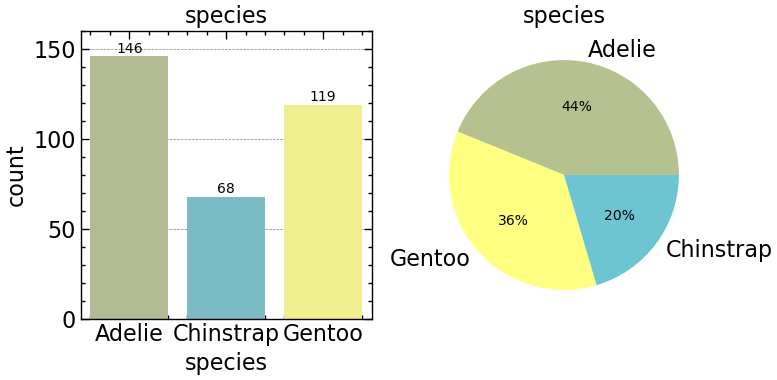

In [17]:
plt.style.use(['science','notebook','grid'])

variable = 'species'

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)

ax = sns.countplot(x=variable, data= df, palette = ['#B5C18E','#6DC5D1', '#FFFF80'])

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 2,
            s = '{:.0f}'.format(height), 
            ha = 'center'        
           )
plt.title(variable)
plt.ylim(0, 160)

# pie chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
colors = sns.color_palette(['#B5C18E','#FFFF80','#6DC5D1'])
plt.pie(counts, labels = counts.index, autopct='%0.f%%', colors = colors)
plt.title(variable)

plt.tight_layout()
plt.show()

Dapat kita lihat jumlah species penguin
* species Adelie sebanyak 146 sebesar 44%
* species Chinstrap sebanyak 68 sebesar 20%
* species Gentoo sebanyak 146 sebesar 36%

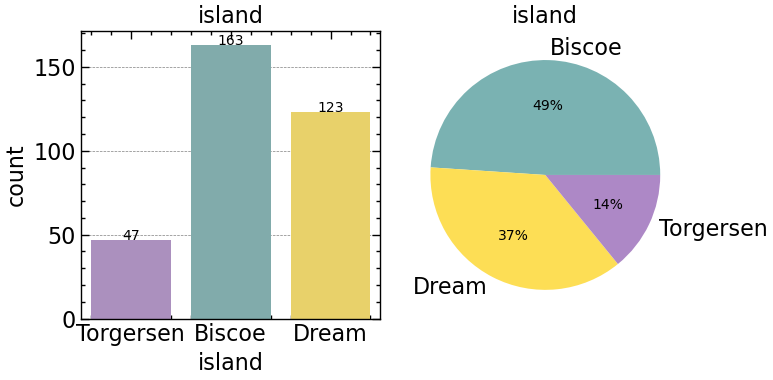

In [18]:
plt.style.use(['science','notebook','grid'])

variable = 'island'

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)

ax = sns.countplot(x=variable, data= df, palette = ['#AD88C6','#7AB2B2', '#FDDE55'])

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height,
            s = '{:.0f}'.format(height), 
            ha = 'center'        
           )
plt.title(variable)


# pie chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
colors = sns.color_palette(['#7AB2B2','#FDDE55','#AD88C6'])
plt.pie(counts, labels = counts.index, autopct='%0.f%%', colors = colors)
plt.title(variable)

plt.tight_layout()
plt.show()

Pulau-pulau yang menjadi tempat jenis-jenis penguin
* Pulau Torgesen sebanyak 47 pungeuin sebesar 14%
* Pulau Biscoe sebanyak 163 pungeuin sebesar 49%
* Pulau Dream sebanyak 37 pungeuin sebesar 37%

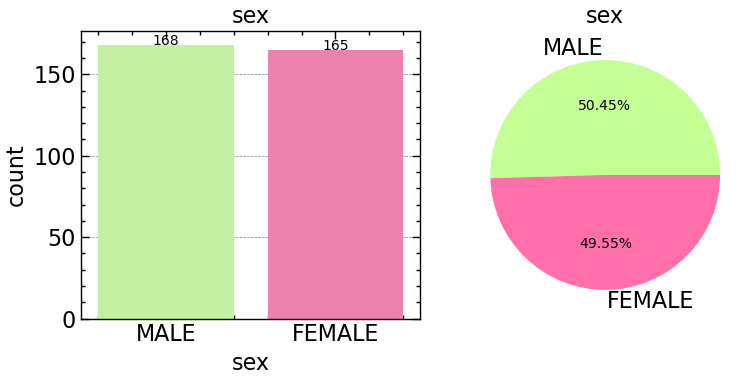

In [19]:
plt.style.use(['science','notebook','grid'])

variable = 'sex'

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)

ax = sns.countplot(x=variable, data= df, palette = ['#C3FF93','#FF70AB'])

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height,
            s = '{:.0f}'.format(height), 
            ha = 'center'        
           )
plt.title(variable)


# pie chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
colors = sns.color_palette(['#C3FF93','#FF70AB'])
plt.pie(counts, labels = counts.index, autopct='%0.2f%%', colors = colors)
plt.title(variable)

plt.tight_layout()
plt.show()

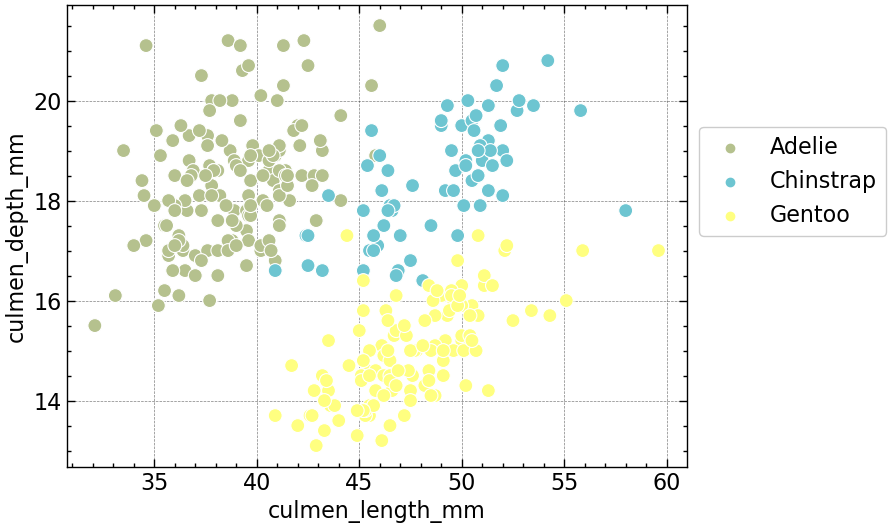

In [20]:
sns.scatterplot(x= 'culmen_length_mm', y= 'culmen_depth_mm', data=df, hue='species', s=100, palette=['#B5C18E','#6DC5D1', '#FFFF80'])
plt.legend(loc=(1.02, 0.5));

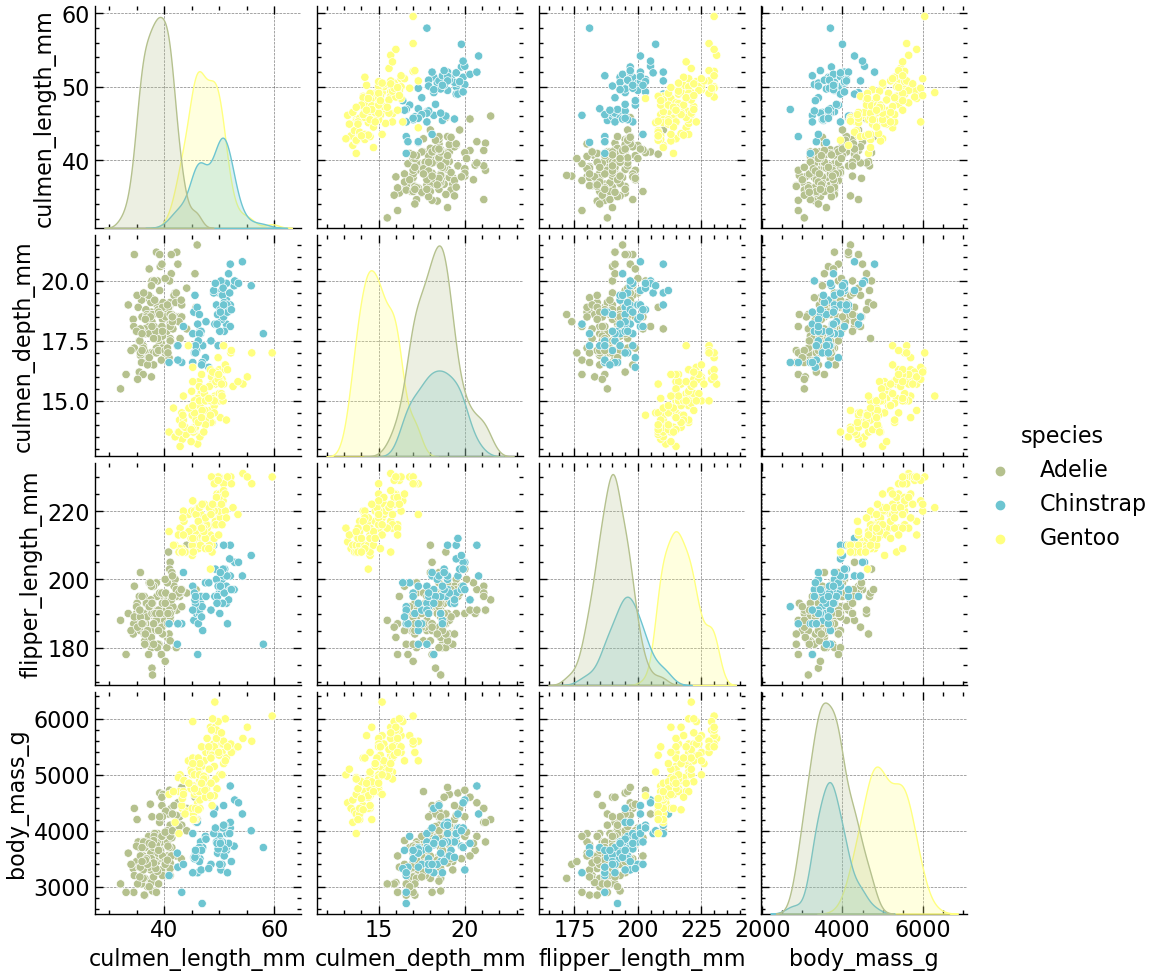

In [21]:
sns.pairplot(df, hue='species', palette=['#B5C18E','#6DC5D1', '#FFFF80']);

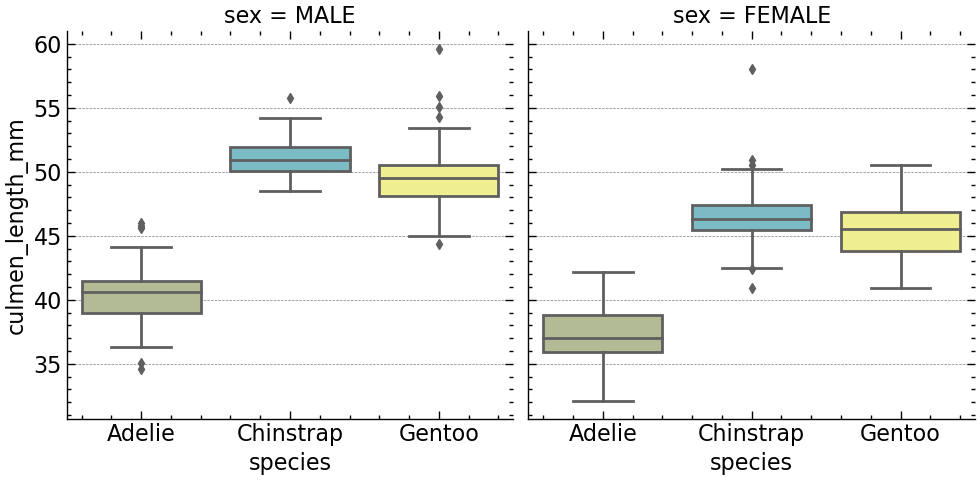

In [22]:
sns.catplot(x ='species',y= 'culmen_length_mm', data= df, col='sex', palette=['#B5C18E','#6DC5D1', '#FFFF80'], kind='box');

## Feature Engeneering

In [23]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [24]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [25]:
pd.get_dummies(df.drop('species',axis =1), drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [26]:
X = pd.get_dummies(df.drop('species',axis =1), drop_first=True)
y = df['species']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size =0.3, random_state = 101)

## Model DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()

In [35]:
help( DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_

## Hyperparameter Tuning

In [36]:
param_grid = {'criterion' :['gini','entropy'], 
              'max_depth':[2,3,4], 
              'max_features' : [1,2,3,4,5,None]}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_model = GridSearchCV(model, param_grid)

In [39]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': [1, 2, 3, 4, 5, None]})

In [41]:
grid_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [44]:
grid_model.best_estimator_.feature_importances_

array([0.34035881, 0.02010577, 0.60147473, 0.        , 0.03806069,
       0.        , 0.        ])

In [46]:
pd.DataFrame(index = X.columns, data= grid_model.best_estimator_.feature_importances_, columns=['Feature importances'])

,Feature importances
culmen_length_mm,0.340359
culmen_depth_mm,0.020106
flipper_length_mm,0.601475
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.000000


In [47]:
imp_features = pd.DataFrame(index = X.columns, data= grid_model.best_estimator_.feature_importances_, columns=['Feature importances']).sort_values(ascending=False, by ='Feature importances' )

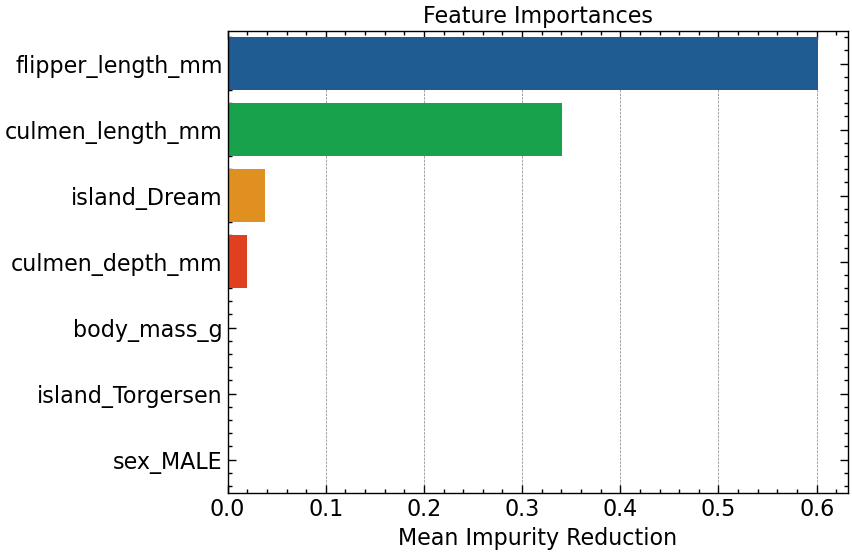

In [52]:
sns.barplot(y=imp_features.index, x= imp_features['Feature importances']);
plt.title('Feature Importances')
plt.xlabel('Mean Impurity Reduction');

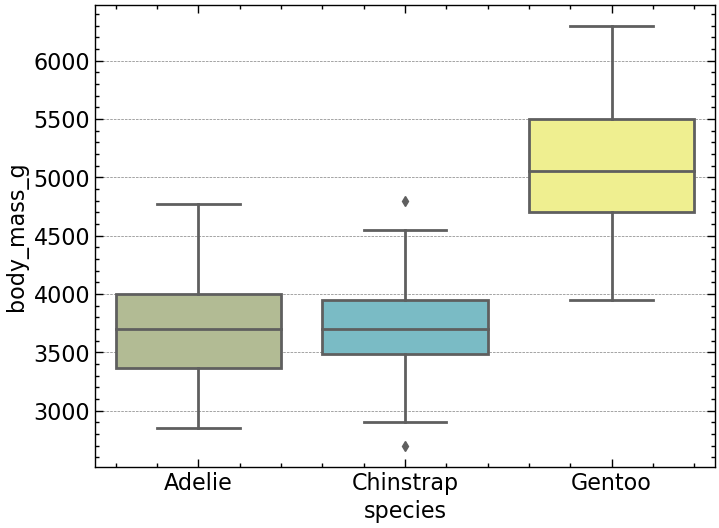

In [54]:
sns.boxplot(x='species', y='body_mass_g', data=df, palette=['#B5C18E','#6DC5D1', '#FFFF80']);

In [55]:
predictions = grid_model.predict(X_test)

## Evaluation Metrics

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [59]:
confusion_matrix(y_test, predictions)

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]], dtype=int64)

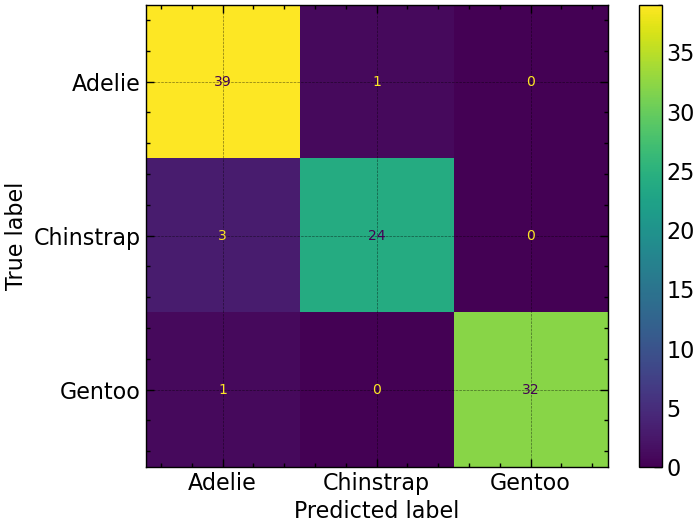

In [60]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [62]:
accuracy_score(y_test, predictions)

0.95

## Plot Tree

In [63]:
from sklearn.tree import plot_tree

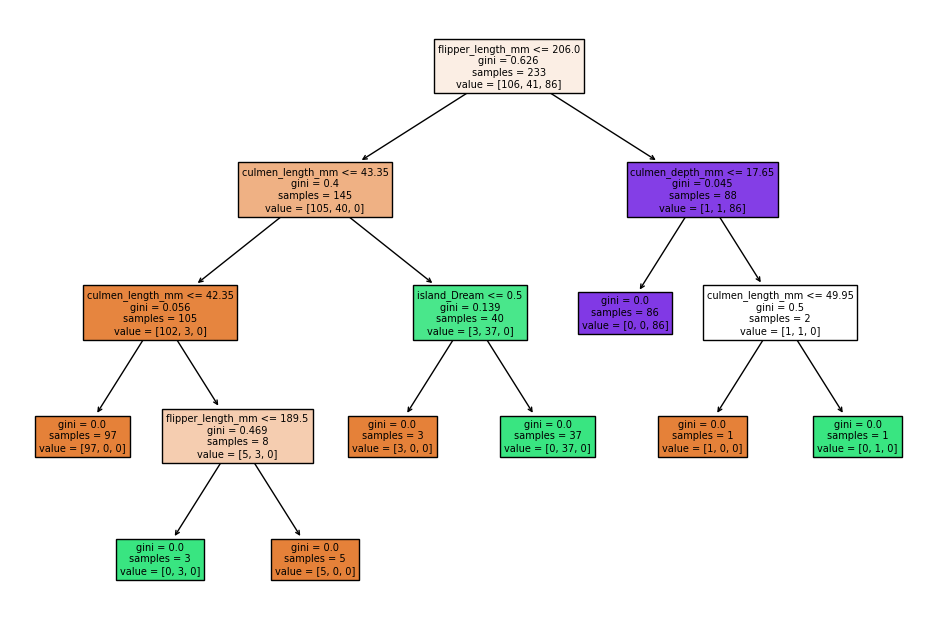

In [67]:
plt.figure(figsize=(12, 8))
plot_tree(grid_model.best_estimator_, filled=True, feature_names = X.columns);